In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
%matplotlib inline

In [2]:
class Coord(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y

class Line(object):
    def __init__(self, source, destination):
        self.x1 = source.x
        self.y1 = source.y
        self.x2 = destination.x
        self.y2 = destination.y
        
    def svg(self):
        svg_template = """<line x1="%s" y1="%s" x2="%s" y2="%s" style="stroke:black;stroke-width:2" />"""
        return svg_template % (self.x1, self.y1, self.x2, self.y2)
    
    def draw(self, plot):
        plot.plot([self.x1,self.x2],[self.y1,self.y2], 'k-', lw=1)
        
class Box(object):
    def __init__(self,corner1, corner2):
        self.x1 = corner1.x
        self.y1 = corner1.y
        self.x2 = corner2.x
        self.y2 = corner2.y
        self.volume = self._get_volume()
        self.sub_boxes = []
        self.lines = self.border_lines()

    def return_lines(self):
        lines = []
        if len(self.sub_boxes) > 0:
            for box in self.sub_boxes:
                for line in box.return_lines():
                    lines.append(line)
        else:
            for line in self.lines:
                lines.append(line)
        return lines
            
        
    def border_lines(self):
        return [Line(Coord(self.x1, self.y1),Coord(self.x1, self.y2)),
                Line(Coord(self.x1, self.y2),Coord(self.x2, self.y2)),
                Line(Coord(self.x2, self.y2),Coord(self.x2, self.y1)),
                Line(Coord(self.x2, self.y1),Coord(self.x1, self.y1))]
        
    def _get_volume(self):
        return abs(self.x2-self.x1) * abs(self.y2-self.y1)
    
    def colorize(self):
        if self.sub_boxes == []:
            color = random.choice(["red", "yellow", "blue", "none", "none", "none", "none", "none", "none"])
            rect = patches.Rectangle((self.x1,self.y1),(self.x2 - self.x1),(self.y2 - self.y1),linewidth=0,edgecolor='r',facecolor=color)
            ax.add_patch(rect)
        else:
            for box in self.sub_boxes:
                box.colorize()
    
    def draw(self, plot):
        
        for box in self.sub_boxes:
            box.draw(plot)
        
        for line in self.lines:
            line.draw(plot)
    
    def __str__(self):
        return "(%s,%s) to (%s,%s)" % (self.x1, self.y1, self.x2, self.y2)
    
    def split(self):   
        
        box_width = abs(self.x2 - self.x1)
        box_height = abs(self.y2 - self.y1)
        
        extra_direction = "Horiz" if box_height > box_width else "Vert"
        
        direction = random.choice(["Horiz", "Vert", extra_direction])
        if direction == "Horiz":
    
            y_range = [self.y1, self.y2]
            y_range.sort()

            y = random.choice([y for y in range(*y_range)])

            box1 = Box(Coord(self.x1, self.y2), Coord(self.x2, y))
            box2 = Box(Coord(self.x1, y), Coord(self.x2, self.y1))
            
        elif direction == "Vert":
            x_range = [self.x1, self.x2]
            x_range.sort()

            x = random.choice([x for x in range(*x_range) if x != 5])

            box1 = Box(Coord(self.x1, self.y1), Coord(x, self.y2))
            box2 = Box(Coord(x, self.y1), Coord(self.x2, self.y2))

        self.sub_boxes.append(box1)
        self.sub_boxes.append(box2)

        for box in self.sub_boxes:
            if random.choice([1,0]) == 1:
                if box.volume > 1:
                    box.split()

In [3]:
def draw_ax(ax):
    x = Box(Coord(0,0), Coord(12,8))
    left_half = Box(Coord(0,0), Coord(6,8))
    right_half = Box(Coord(6,8), Coord(12,0))

    left_box = Box(Coord(0,2),Coord(2,6))
    top_left_box = Box(Coord(0,6),Coord(6,8))
    mid_left_box = Box(Coord(2,2),Coord(6,6))
    bot_left_box = Box(Coord(0,0),Coord(6,2))
    top_left_box_small = Box(Coord(0,6),Coord(2,8))
    bot_left_box_small = Box(Coord(0,0),Coord(2,2))
    top_mid_left_box = Box(Coord(2,2),Coord(6,8))
    bot_mid_left_box = Box(Coord(2,0),Coord(6,6))
    left_big = Box(Coord(2,0),Coord(6,8))

    right_box = Box(Coord(10,2),Coord(12,6))
    top_right_box = Box(Coord(6,6),Coord(12,8))
    mid_right_box = Box(Coord(6,2),Coord(10,6))
    bot_right_box = Box(Coord(6,0),Coord(12,2))
    top_right_box_small = Box(Coord(10,6),Coord(12,8))
    bot_right_box_small = Box(Coord(10,0),Coord(12,2))
    top_mid_right_box = Box(Coord(6,2),Coord(10,8))
    bot_mid_right_box = Box(Coord(6,0),Coord(10,6))
    right_big = Box(Coord(6,0),Coord(10,8))

    left_options = [[top_left_box_small, bot_left_box_small, left_big],
                    [top_left_box, bot_mid_left_box, bot_left_box_small],
                    [top_left_box, bot_left_box, mid_left_box],
                    [bot_left_box_small, bot_mid_left_box, top_left_box]]

    selection = random.choice(left_options)
    left_half.sub_boxes.append(left_box)
    for box in selection:
        box.split()
        left_half.sub_boxes.append(box)

    right_options = [[top_right_box_small, bot_right_box_small, right_big],
                     [top_right_box, bot_mid_right_box, bot_right_box_small],
                     [top_right_box, bot_right_box, mid_right_box],
                     [bot_right_box_small, bot_mid_right_box, top_right_box]]

    selection = random.choice(right_options)
    right_half.sub_boxes.append(right_box)
    for box in selection:
        box.split()
        right_half.sub_boxes.append(box)

    x.sub_boxes.append(left_half)
    x.sub_boxes.append(right_half)
    
    x.colorize()
    x.draw(ax)
    center_circle = patches.Circle((6,4), 1,linewidth=1,edgecolor='black',facecolor="none")
    center_dot = patches.Circle((6,4), 0.1,linewidth=1,edgecolor='black',facecolor="black")
    left_dot = patches.Circle((1.5,4), 0.1,linewidth=1,edgecolor='black',facecolor="black")
    right_dot = patches.Circle((10.5,4), 0.1,linewidth=1,edgecolor='black',facecolor="black")
    left_arc = patches.Arc((1.5,4),2,2, theta1=300.0, theta2=60.0,linewidth=1,edgecolor='black',facecolor="black")
    right_arc = patches.Arc((10.5,4),2,2, theta1=120.0, theta2=240.0,linewidth=1,edgecolor='black',facecolor="black")

    set_of_patches = [center_circle, center_dot, left_dot, right_dot, left_arc, right_arc]
    for patch in set_of_patches:
        ax.add_patch(patch)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
    
    return x.return_lines()

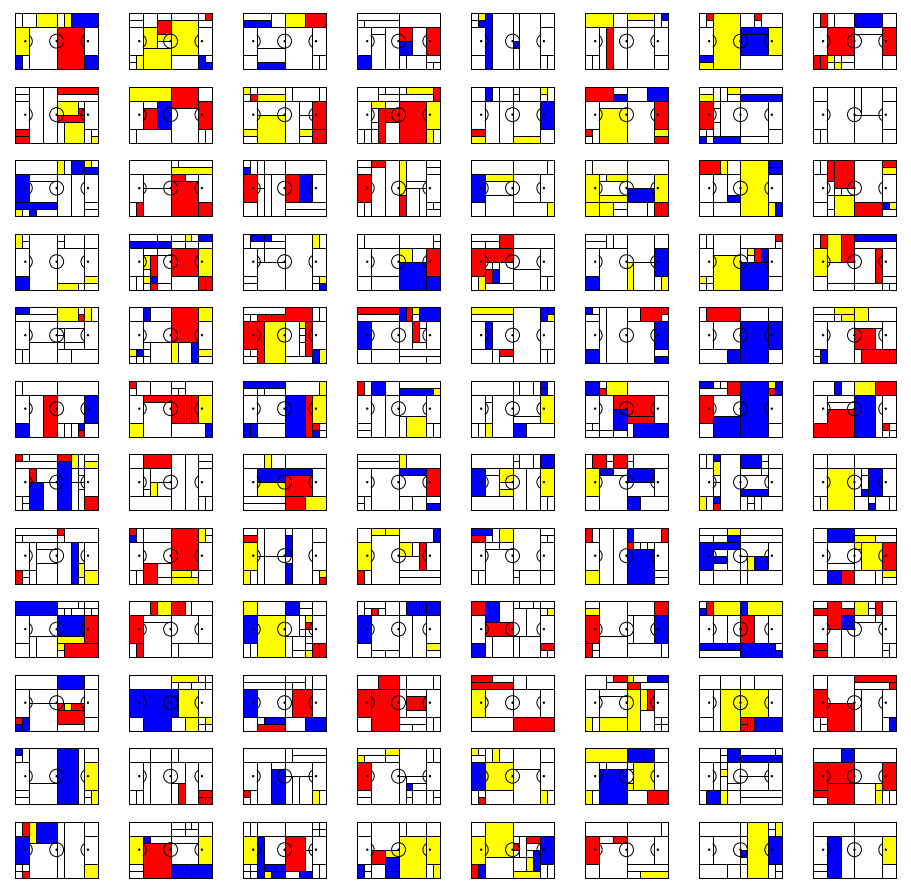

In [4]:
seed_number = 9
random.seed(seed_number)
wide,down = 8,12
fig,axes = plt.subplots(down,wide, figsize=(16, 16))

for i in range(0,down):
    for j in range(0,wide):
        ax = axes[i][j]
        ax.set(aspect=1)
        lines = draw_ax(ax)

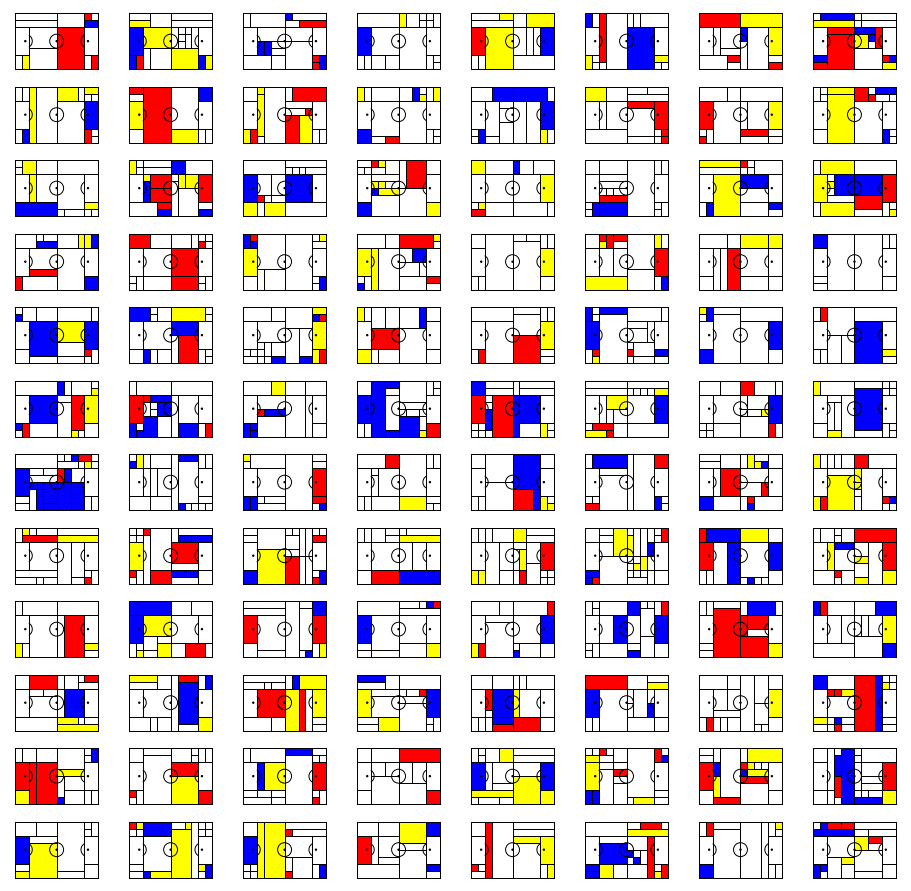

In [5]:
seed_number = 12
random.seed(seed_number)
wide,down = 8,12
fig,axes = plt.subplots(down,wide, figsize=(16, 16))

for i in range(0,down):
    for j in range(0,wide):
        ax = axes[i][j]
        ax.set(aspect=1)
        lines = draw_ax(ax)

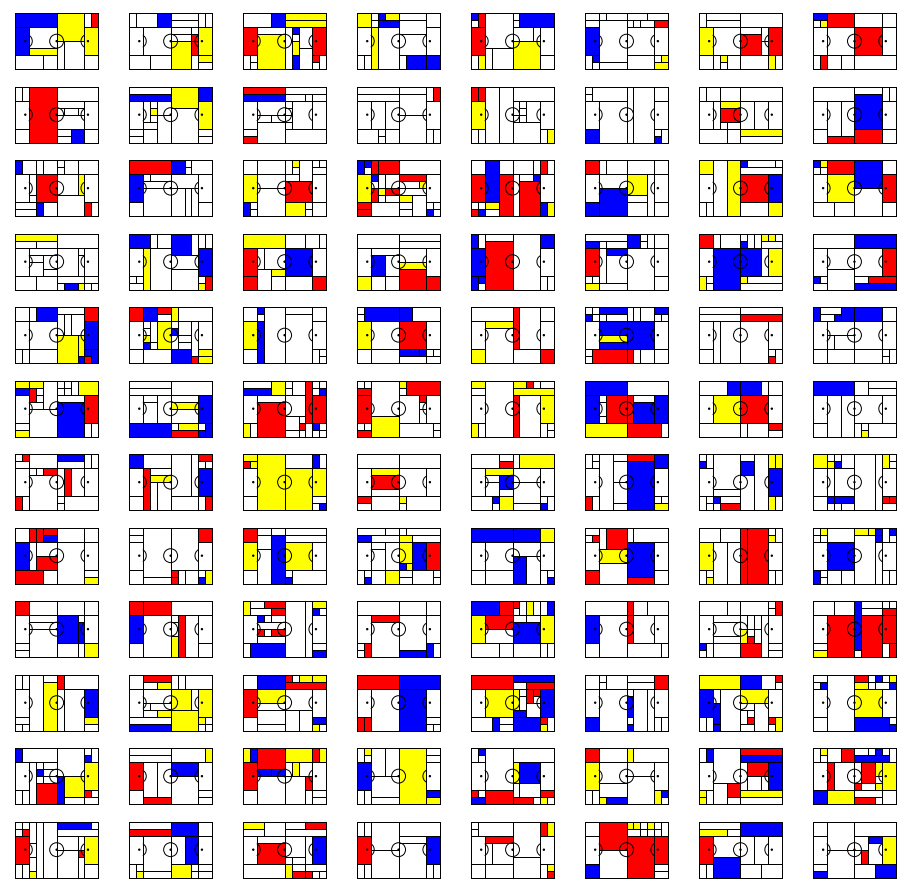

In [6]:
seed_number = 23
random.seed(seed_number)
wide,down = 8,12
fig,axes = plt.subplots(down,wide, figsize=(16, 16))

for i in range(0,down):
    for j in range(0,wide):
        ax = axes[i][j]
        ax.set(aspect=1)
        lines = draw_ax(ax)

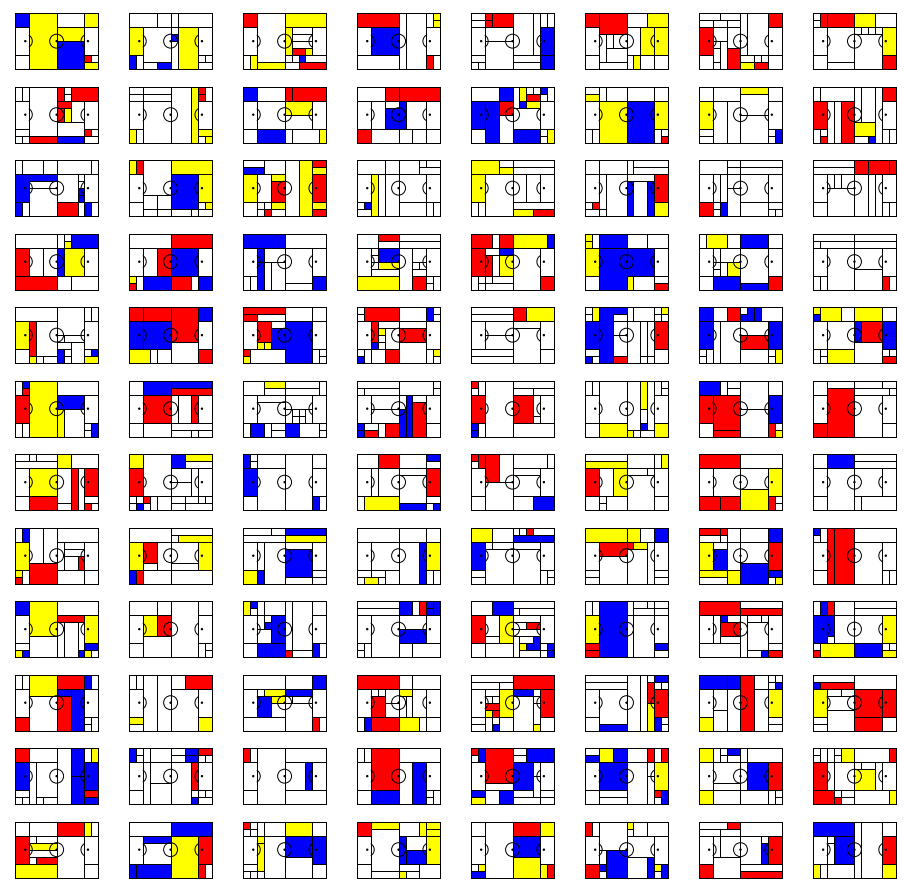

In [7]:
seed_number = 43
random.seed(seed_number)
wide,down = 8,12
fig,axes = plt.subplots(down,wide, figsize=(16, 16))

for i in range(0,down):
    for j in range(0,wide):
        ax = axes[i][j]
        ax.set(aspect=1)
        lines = draw_ax(ax)

In [ ]:
!!